# EDA for IMD

- Robert Yonce
- 5/4/23

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load in CSVs and Combined

In [3]:
# Files

results_01 = pd.read_csv('data/final_tmdb_data_2001.csv.gz')

results_00 = pd.read_csv('data/final_tmdb_data_2000.csv.gz')

In [4]:
# Combined DFs

frames = [results_00, results_01]

combined = pd.concat(frames)

In [5]:
# Info on combined DF

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 1327
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2562 non-null   object 
 1   adult                  2560 non-null   float64
 2   backdrop_path          1388 non-null   object 
 3   belongs_to_collection  206 non-null    object 
 4   budget                 2560 non-null   float64
 5   genres                 2560 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2560 non-null   float64
 8   original_language      2560 non-null   object 
 9   original_title         2560 non-null   object 
 10  overview               2509 non-null   object 
 11  popularity             2560 non-null   float64
 12  poster_path            2303 non-null   object 
 13  production_companies   2560 non-null   object 
 14  production_countries   2560 non-null   object 
 15  rele

In [7]:
# check for duplicate ID's 

combined.duplicated(subset='id').sum()


1

In [8]:
# Drop duplicate ids and confirm there are no more duplicates

combined = combined.drop_duplicates(subset='id')
combined.duplicated(subset='id').sum()

0

## Making filters for Budget and Revenue

In [9]:
# Budget Filter

bud = combined['budget'] > 0

combined_bud = combined[bud]

In [10]:
# Revenue Filter

rev = combined['revenue'] > 0

combined_rev = combined[rev]

## Combine the two filters

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

    - 991 below

In [11]:
# New filters combined

frames2 = [combined_rev, combined_bud]

new_combined = pd.concat(frames2)

new_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 4 to 1306
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                991 non-null    object 
 1   adult                  991 non-null    float64
 2   backdrop_path          887 non-null    object 
 3   belongs_to_collection  198 non-null    object 
 4   budget                 991 non-null    float64
 5   genres                 991 non-null    object 
 6   homepage               127 non-null    object 
 7   id                     991 non-null    float64
 8   original_language      991 non-null    object 
 9   original_title         991 non-null    object 
 10  overview               989 non-null    object 
 11  popularity             991 non-null    float64
 12  poster_path            972 non-null    object 
 13  production_companies   991 non-null    object 
 14  production_countries   991 non-null    object 
 15  relea

## Save DF to CSV

In [12]:
new_combined.to_csv("tmdb_results_combined.csv.gz", compression='gzip', index=False)

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        374
PG-13    248
PG        66
G         27
NR        24
Name: certification, dtype: int64

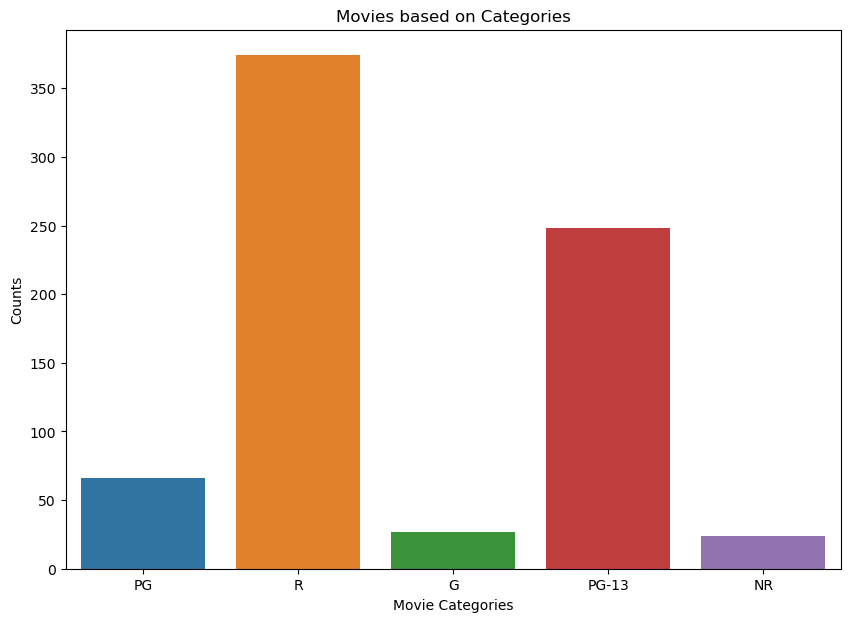

In [13]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.countplot(data = new_combined, x ='certification')
ax.set(title = 'Movies based on Categories')
ax.set(ylabel = 'Counts')
ax.set(xlabel = 'Movie Categories');

display(new_combined['certification'].value_counts());

## What is the average revenue per certification category?

In [14]:
avg_rev = new_combined.groupby(['certification'])['revenue'].mean().reset_index()

avg_rev

,certification,revenue
0,G,1.283062e+08
1,NR,1.324439e+07
2,PG,1.177706e+08
3,PG-13,1.048614e+08
4,R,3.999746e+07


## What is the average budget per certification category?

In [15]:
avg_bud = new_combined.groupby('certification')['budget'].mean().reset_index()

avg_bud

,certification,budget
0,G,4.237037e+07
1,NR,8.410004e+06
2,PG,4.739764e+07
3,PG-13,4.470788e+07
4,R,2.228588e+07
